In [2]:
import pandas as pd
import numpy as np
import os
import random
import librosa
import matplotlib.pyplot as plt

In [3]:
new_label = pd.read_csv('../audio_data/8k/labels.csv')
old_label = pd.read_csv('../audio_data/2k/labels.csv')

In [4]:
old_label

filename  fold  target        category  esc10  src_file take
0      1-100032-A-0.wav     1       0             dog   True    100032    A
1     1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2     1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3     1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4     1-101296-A-19.wav     1      19    thunderstorm  False    101296    A
...                 ...   ...     ...             ...    ...       ...  ...
1995   5-263831-B-6.wav     5       6             hen  False    263831    B
1996  5-263902-A-36.wav     5      36  vacuum_cleaner  False    263902    A
1997   5-51149-A-25.wav     5      25       footsteps  False     51149    A
1998    5-61635-A-8.wav     5       8           sheep  False     61635    A
1999     5-9032-A-0.wav     5       0             dog   True      9032    A

[2000 rows x 7 columns]

In [5]:
new_label['filename'] = new_label['fold'].astype('str') + '-' + new_label['slice_file_name']

In [6]:
new_label.to_csv('../audio_data/8k/labels.csv', index=False)

In [11]:
# To get a list of the pathes of all the audio files
data = "../audio_data/8k/22050/"
dataset = pd.read_csv('../audio_data/8k/labels.csv')
all_files = []
for path, subdirs, files in os.walk(data):
    for name in files:
        all_files.append(os.path.join(path, name))
        
# A dictionary to decode the categories into targets
#decoder = {0: 'dog', 14: 'chirping_birds', 36: 'vacuum_cleaner', 19: 'thunderstorm', 30: 'door_wood_knock',34: 'can_opening', 9: 'crow', 22: 'clapping', 48: 'fireworks', 41: 'chainsaw', 47: 'airplane', 31: 'mouse_click', 17: 'pouring_water', 45: 'train', 8: 'sheep', 15: 'water_drops', 46: 'church_bells', 37: 'clock_alarm', 32: 'keyboard_typing', 16: 'wind', 25: 'footsteps', 4: 'frog', 3: 'cow', 27: 'brushing_teeth', 43: 'car_horn', 12: 'crackling_fire', 40: 'helicopter', 29: 'drinking_sipping', 10: 'rain', 7: 'insects', 26: 'laughing', 6: 'hen', 44: 'engine', 23: 'breathing', 20: 'crying_baby', 49: 'hand_saw', 24: 'coughing', 39: 'glass_breaking', 28: 'snoring', 18: 'toilet_flush', 2: 'pig', 35: 'washing_machine', 38: 'clock_tick', 21: 'sneezing', 1: 'rooster', 11: 'sea_waves', 42: 'siren', 5: 'cat', 33: 'door_wood_creaks', 13: 'crickets'}

# A dictionary to encode the categories into targets
#encoder = {'dog': 0, 'chirping_birds': 14, 'vacuum_cleaner': 36, 'thunderstorm': 19, 'door_wood_knock': 30, 'can_opening': 34, 'crow': 9, 'clapping': 22, 'fireworks': 48, 'chainsaw': 41, 'airplane': 47, 'mouse_click': 31, 'pouring_water': 17, 'train': 45, 'sheep': 8, 'water_drops': 15, 'church_bells': 46, 'clock_alarm': 37, 'keyboard_typing': 32, 'wind': 16, 'footsteps': 25, 'frog': 4, 'cow': 3, 'brushing_teeth': 27, 'car_horn': 43, 'crackling_fire': 12, 'helicopter': 40, 'drinking_sipping': 29, 'rain': 10, 'insects': 7, 'laughing': 26, 'hen': 6, 'engine': 44, 'breathing': 23, 'crying_baby': 20, 'hand_saw': 49, 'coughing': 24, 'glass_breaking': 39, 'snoring': 28, 'toilet_flush': 18, 'pig': 2, 'washing_machine': 35, 'clock_tick': 38, 'sneezing': 21, 'rooster': 1, 'sea_waves': 11, 'siren': 42, 'cat': 5, 'door_wood_creaks': 33, 'crickets': 13}

In [35]:
sorted_files = sorted(all_files)
sorted_files[-4:]

['../audio_data/8k/22050/9-99500-2-0-29.wav',
 '../audio_data/8k/22050/9-99500-2-0-39.wav',
 '../audio_data/8k/22050/9-99500-2-0-41.wav',
 '../audio_data/8k/22050/9-99500-2-0-50.wav']

In [36]:
new_label.sort_values(by=['filename'], inplace=True)
new_label.reset_index(drop=True, inplace=True)
new_label

slice_file_name    fsID      start        end  salience  fold  target  \
0     101415-3-0-2.wav  101415   1.000000   5.000000         1     1       3   
1     101415-3-0-3.wav  101415   1.500000   5.500000         1     1       3   
2     101415-3-0-8.wav  101415   4.000000   8.000000         1     1       3   
3     102106-3-0-0.wav  102106   2.243852   3.884477         2     1       3   
4     102305-6-0-0.wav  102305   0.000000   2.611610         1     1       6   
...                ...     ...        ...        ...       ...   ...     ...   
8727  99500-2-0-23.wav   99500  11.500000  15.500000         2     9       2   
8728  99500-2-0-29.wav   99500  14.500000  18.500000         2     9       2   
8729  99500-2-0-39.wav   99500  19.500000  23.500000         2     9       2   
8730  99500-2-0-41.wav   99500  20.500000  24.500000         2     9       2   
8731  99500-2-0-50.wav   99500  25.000000  29.000000         2     9       2   

                 class            filename  duration  
0             dog_bark  1-101415-3-0-2.wav       4.0  
1             dog_bark  1-101415-3-0-3.wav       4.0  
2             dog_bark  1-101415-3-0-8.wav       4.0  
3             dog_bark  1-102106-3-0-0.wav       4.0  
4             gun_shot  1-102305-6-0-0.wav       4.0  
...                ...                 ...       ...  
8727  children_playing  9-99500-2-0-23.wav       4.0  
8728  children_playing  9-99500-2-0-29.wav       4.0  
8729  children_playing  9-99500-2-0-39.wav       4.0  
8730  children_playing  9-99500-2-0-41.wav       4.0  
8731  children_playing  9-99500-2-0-50.wav       4.0  

[8732 rows x 10 columns]

In [37]:
sample_rate_ls = []
duration_ls = []

for file in all_files:
    y, sr = librosa.load(file)
    sample_rate_ls.append(sr)
    duration_ls.append(librosa.get_duration(y=y, sr=sr))

(array([ 134.,  241.,  255.,  217.,  151.,  146.,   91.,   76.,   45.,
        7376.]),
 array([0.05002268, 0.44868934, 0.84735601, 1.24602268, 1.64468934,
        2.04335601, 2.44202268, 2.84068934, 3.23935601, 3.63802268,
        4.03668934]),
 <BarContainer object of 10 artists>)

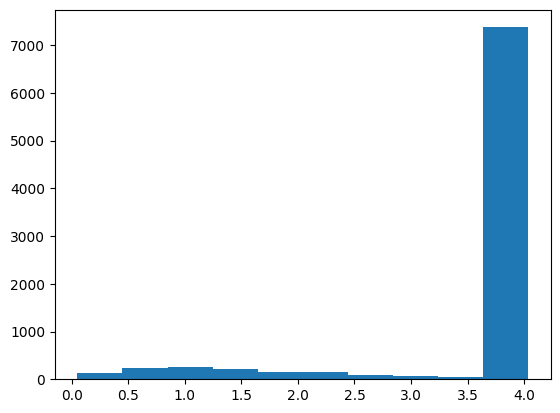

In [38]:
import matplotlib.pyplot as plt

plt.hist(duration_ls)

In [39]:
new_label['duration'] = duration_ls
new_label.sort_values(by='duration', ascending=False)

slice_file_name    fsID       start         end  salience  fold  \
1144   162134-7-5-0.wav  162134  120.266429  122.246864         1    10   
475   180937-7-1-13.wav  180937  199.915715  203.915715         1     1   
7158   113203-5-0-5.wav  113203   45.994706   49.994706         1     8   
8677   79089-0-0-56.wav   79089   37.664375   41.664375         2     9   
6950    57696-4-0-5.wav   57696    2.500000    6.500000         1     7   
...                 ...     ...         ...         ...       ...   ...   
2854  165039-7-16-0.wav  165039  266.373115  270.286981         1     3   
1170   164194-2-0-7.wav  164194   63.364282   67.364282         1    10   
6701   183992-3-0-6.wav  183992    3.000000    7.000000         1     7   
3976   175846-1-0-0.wav  175846    0.143475    1.635387         1     4   
2169  192269-2-0-18.wav  192269    9.000000   13.000000         1     2   

      target             class             filename  duration  
1144       7        jackhammer  10-162134-7-5-0.wav  4.036689  
475        7        jackhammer  1-180937-7-1-13.wav  4.036689  
7158       5     engine_idling   8-113203-5-0-5.wav  4.036689  
8677       0   air_conditioner   9-79089-0-0-56.wav  4.036689  
6950       4          drilling    7-57696-4-0-5.wav  4.036689  
...      ...               ...                  ...       ...  
2854       7        jackhammer  3-165039-7-16-0.wav  0.069070  
1170       2  children_playing  10-164194-2-0-7.wav  0.060000  
6701       3          dog_bark   7-183992-3-0-6.wav  0.060000  
3976       1          car_horn   4-175846-1-0-0.wav  0.050023  
2169       2  children_playing  2-192269-2-0-18.wav  0.050023  

[8732 rows x 10 columns]

In [57]:
new_label['check'] = new_label.duration.apply(lambda x: 1 if x >= 4.0 else 0)

In [58]:
new_label.check.value_counts()

check
0    8724
1       8
Name: count, dtype: int64

In [13]:
plot_files = random.choices(all_files, k = 10)
plot_audios = [librosa.load(plot_files[i]) for i in range(10)]

In [44]:
# Importing 1 file
y, sr = librosa.load(data + "8-61077-3-1-0.wav")

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# The duration is equal to the number of frames divided by the framerate
print('Duration of the audio file:', np.shape(y)[0]/sr, 'second')

y: [ 0.00576465  0.00713643  0.00659589 ... -0.010969   -0.01161282
 -0.01507305] 

y shape: (44982,) 

Sample Rate (KHz): 22050 

Duration of the audio file: 2.04 second


In [42]:
y

array([-0.04289469, -0.06045374, -0.04686992, ..., -0.0214528 ,
       -0.01898436, -0.02159008], dtype=float32)

## 1. Audio-waves

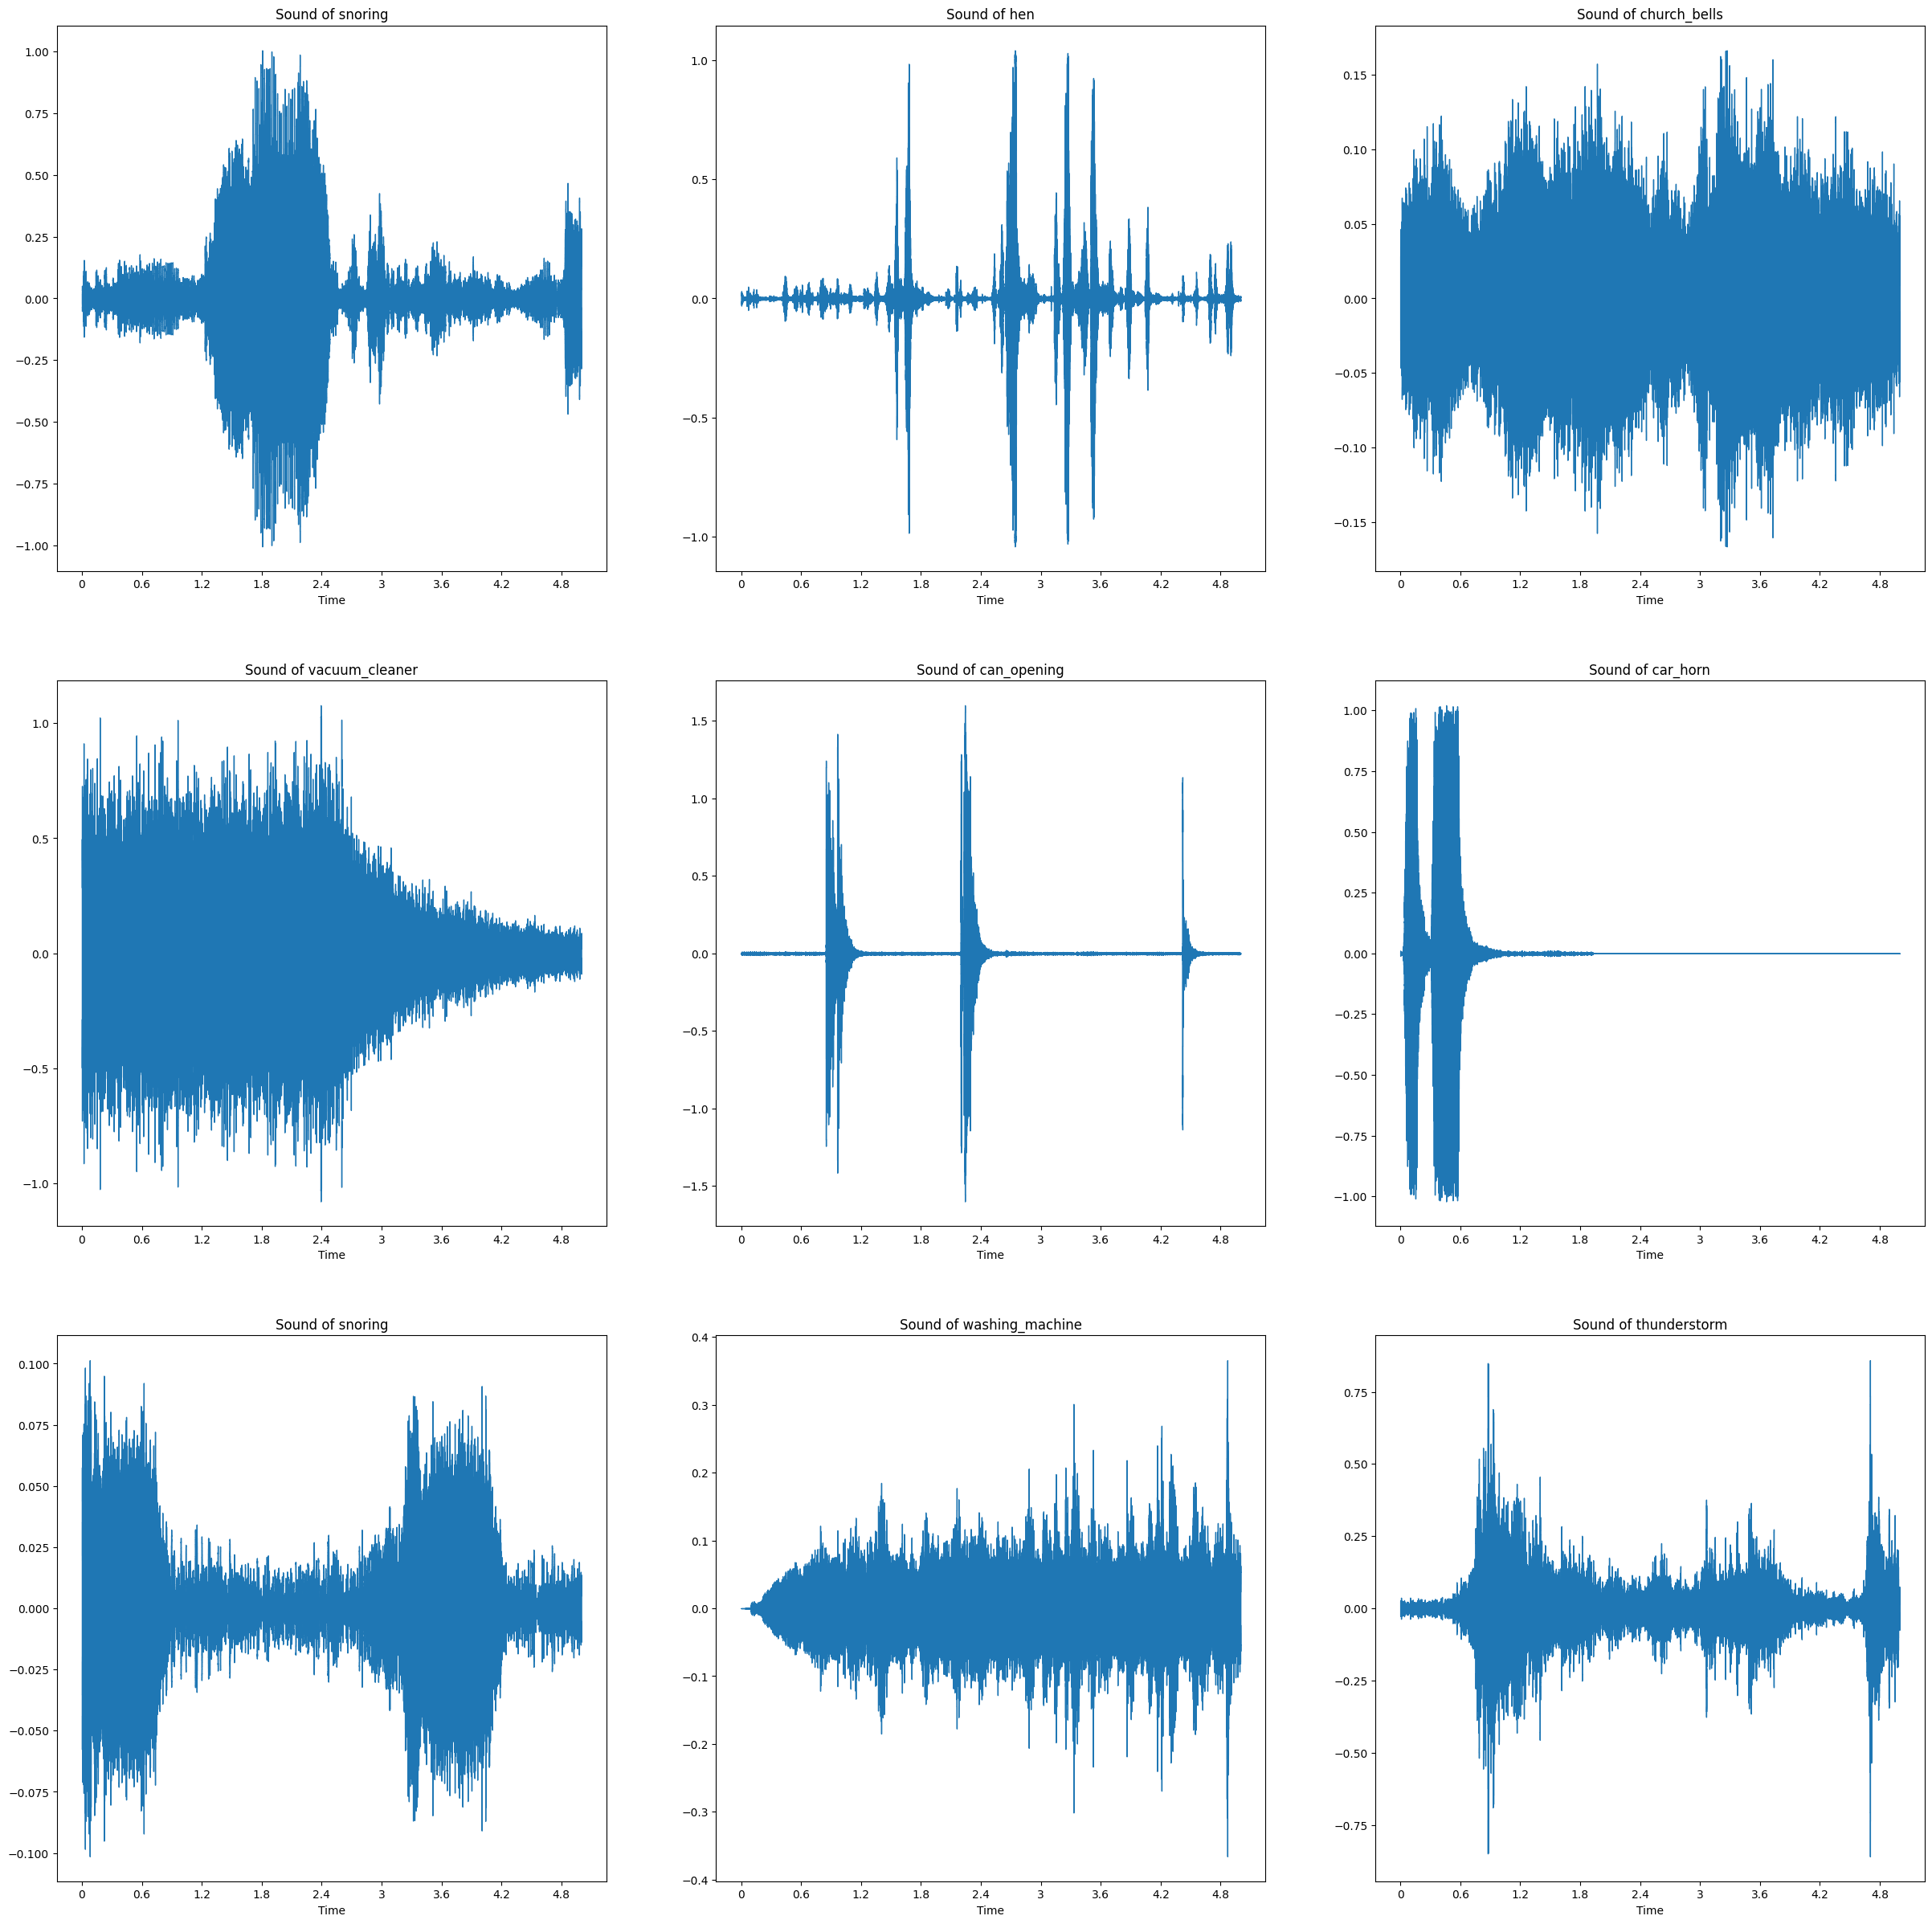

In [12]:
plt.figure(figsize=(30,30))
for i in range(1,10):
    plt.subplot(3,3,i)
    librosa.display.waveshow(plot_audios[i][0])
    try:
        plt.title("Sound of " + decoder[int(plot_files[i][-6:-4])] )
    except:
        plt.title("Sound of " + decoder[int(plot_files[i][-5:-4])] )

## 2. STFT

- time-domain signal to frequency-domain representation of the signal
- relative amplitudes of the different frequency components that make up the signal
- breaks the audio signal into short segments and applies the DFT to each segment

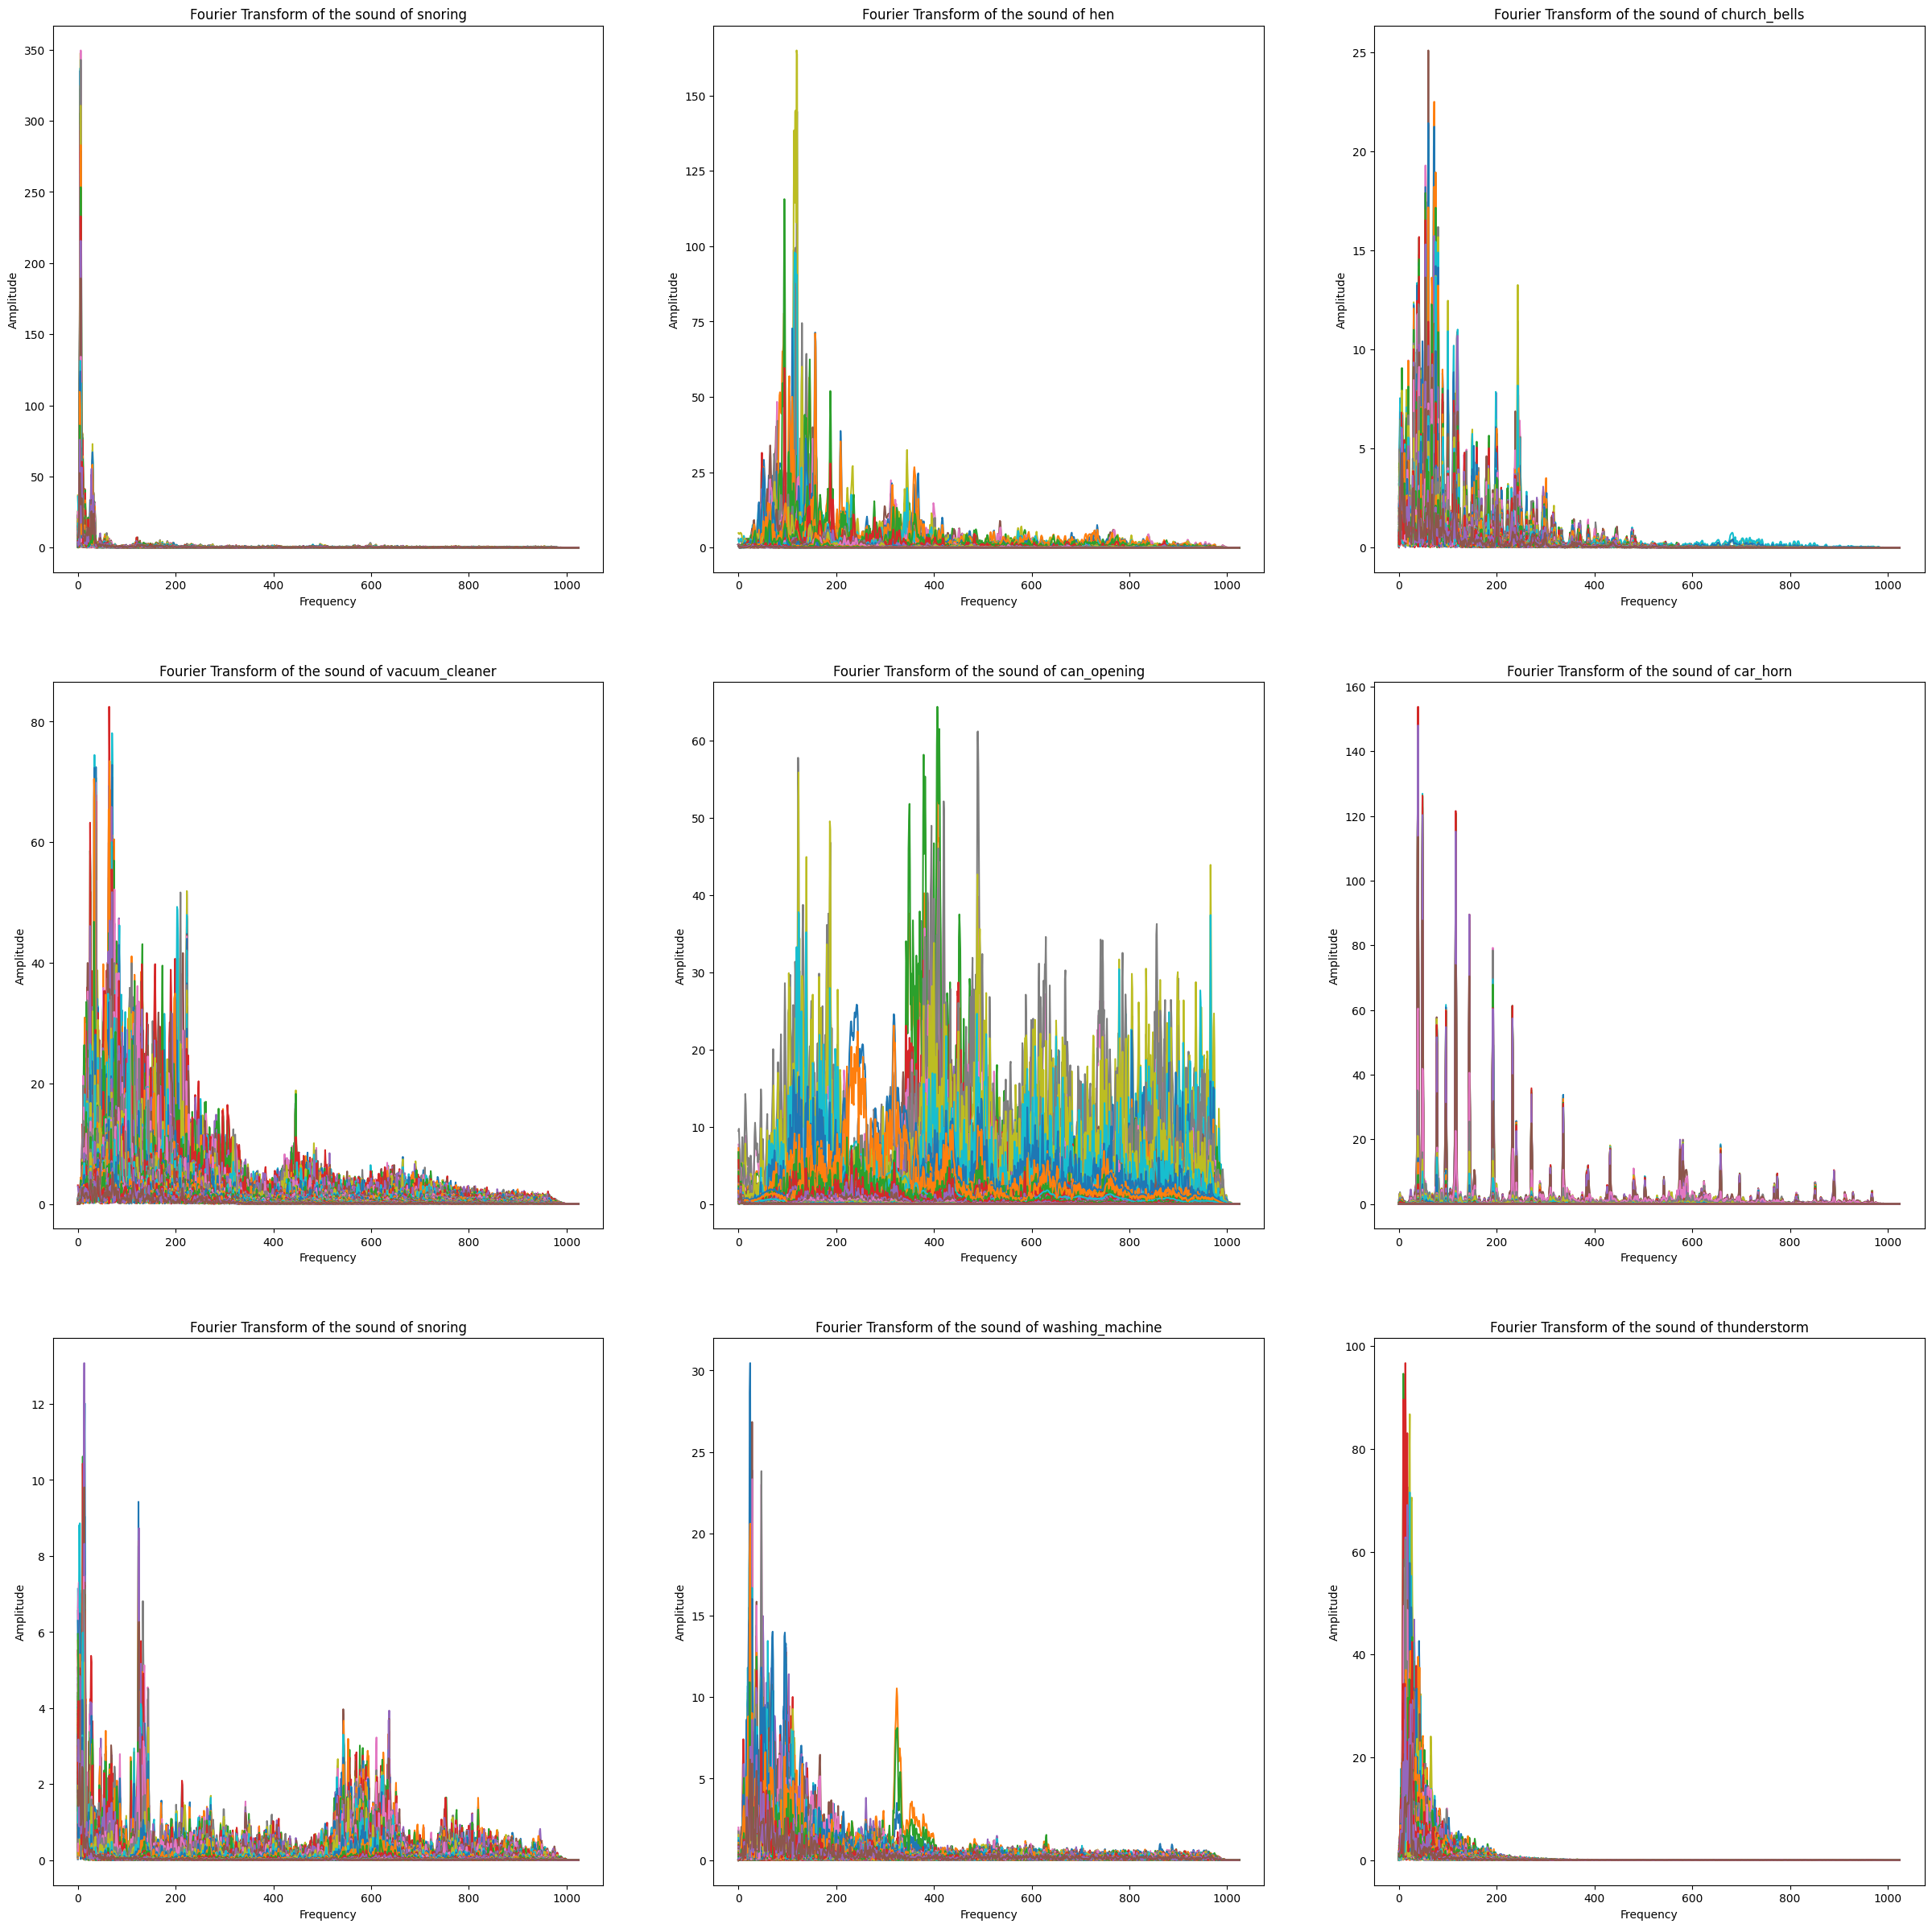

In [14]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns 

plt.figure(figsize=(30,30))
for i in range(1,10):
    plt.subplot(3,3,i)
    X = np.abs(librosa.stft(plot_audios[i][0], n_fft = n_fft, hop_length = hop_length))
    plt.plot(X)
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude");
    try:
        plt.title("Fourier Transform of the sound of " + decoder[int(plot_files[i][-6:-4])] )
    except:
        plt.title("Fourier Transform of the sound of " + decoder[int(plot_files[i][-5:-4])] )

## 2.1 Spectogram

- graphical representation of the frequency content of a signal over time
    - x-axis: time
    - y-axis: frequency
    - color: the amplitude of the frequency component at that point in time

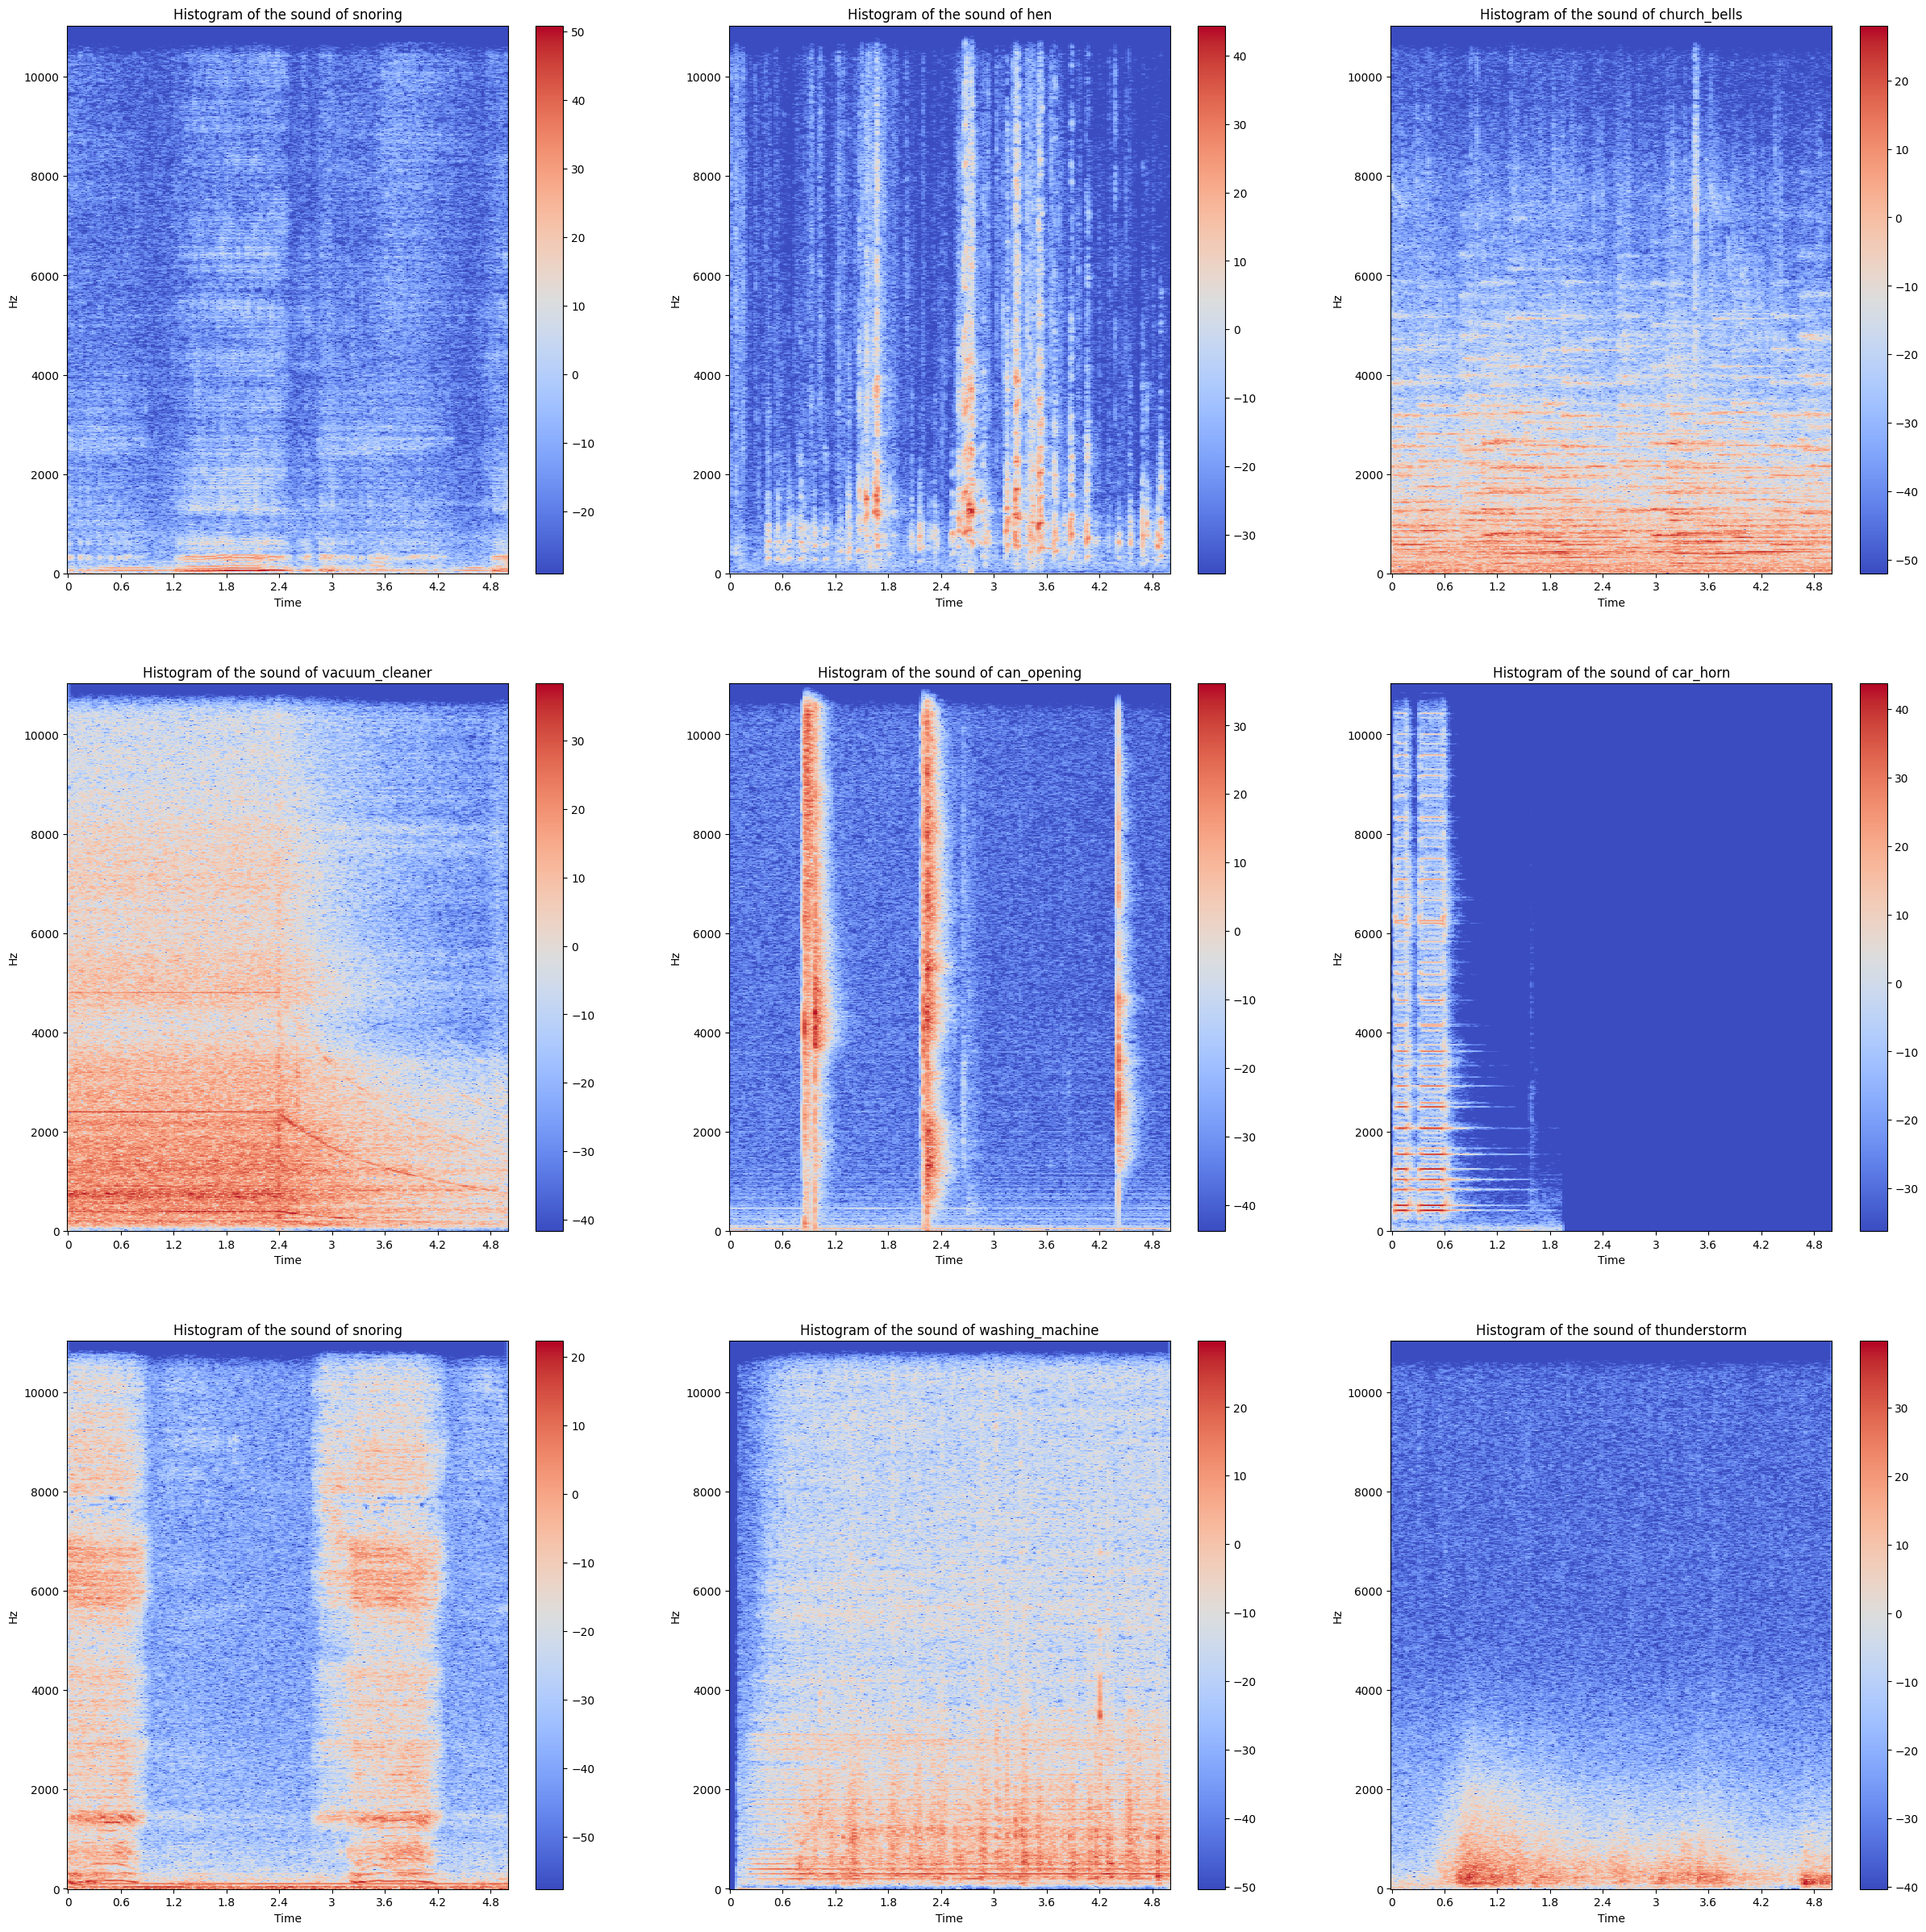

In [15]:
plt.figure(figsize=(30,30))
for i in range(1,10):
    plt.subplot(3,3,i)
    X = librosa.stft(plot_audios[i][0])
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    try:
        plt.title("Histogram of the sound of " + decoder[int(plot_files[i][-6:-4])] )
    except:
        plt.title("Histogram of the sound of " + decoder[int(plot_files[i][-5:-4])] )

Spectogram shows the frequency content of the audio signal over time:
- Temporal information: duration of or between
- Characteristics of a sound: spectral envelope or the harmonic structure
- Segment an audio file into different sound events

### 2.2 Mel Spectogram

- logarithmically renders frequencies above a certain threshold (the corner frequency)
- non-linear scale - with finer resolution at lower frequencies and coarser resolution at higher frequencies, reflecting human auditory sensitivity
- reduces the dimensionality of the frequency due to mel bins that summarize nearby frequencies 

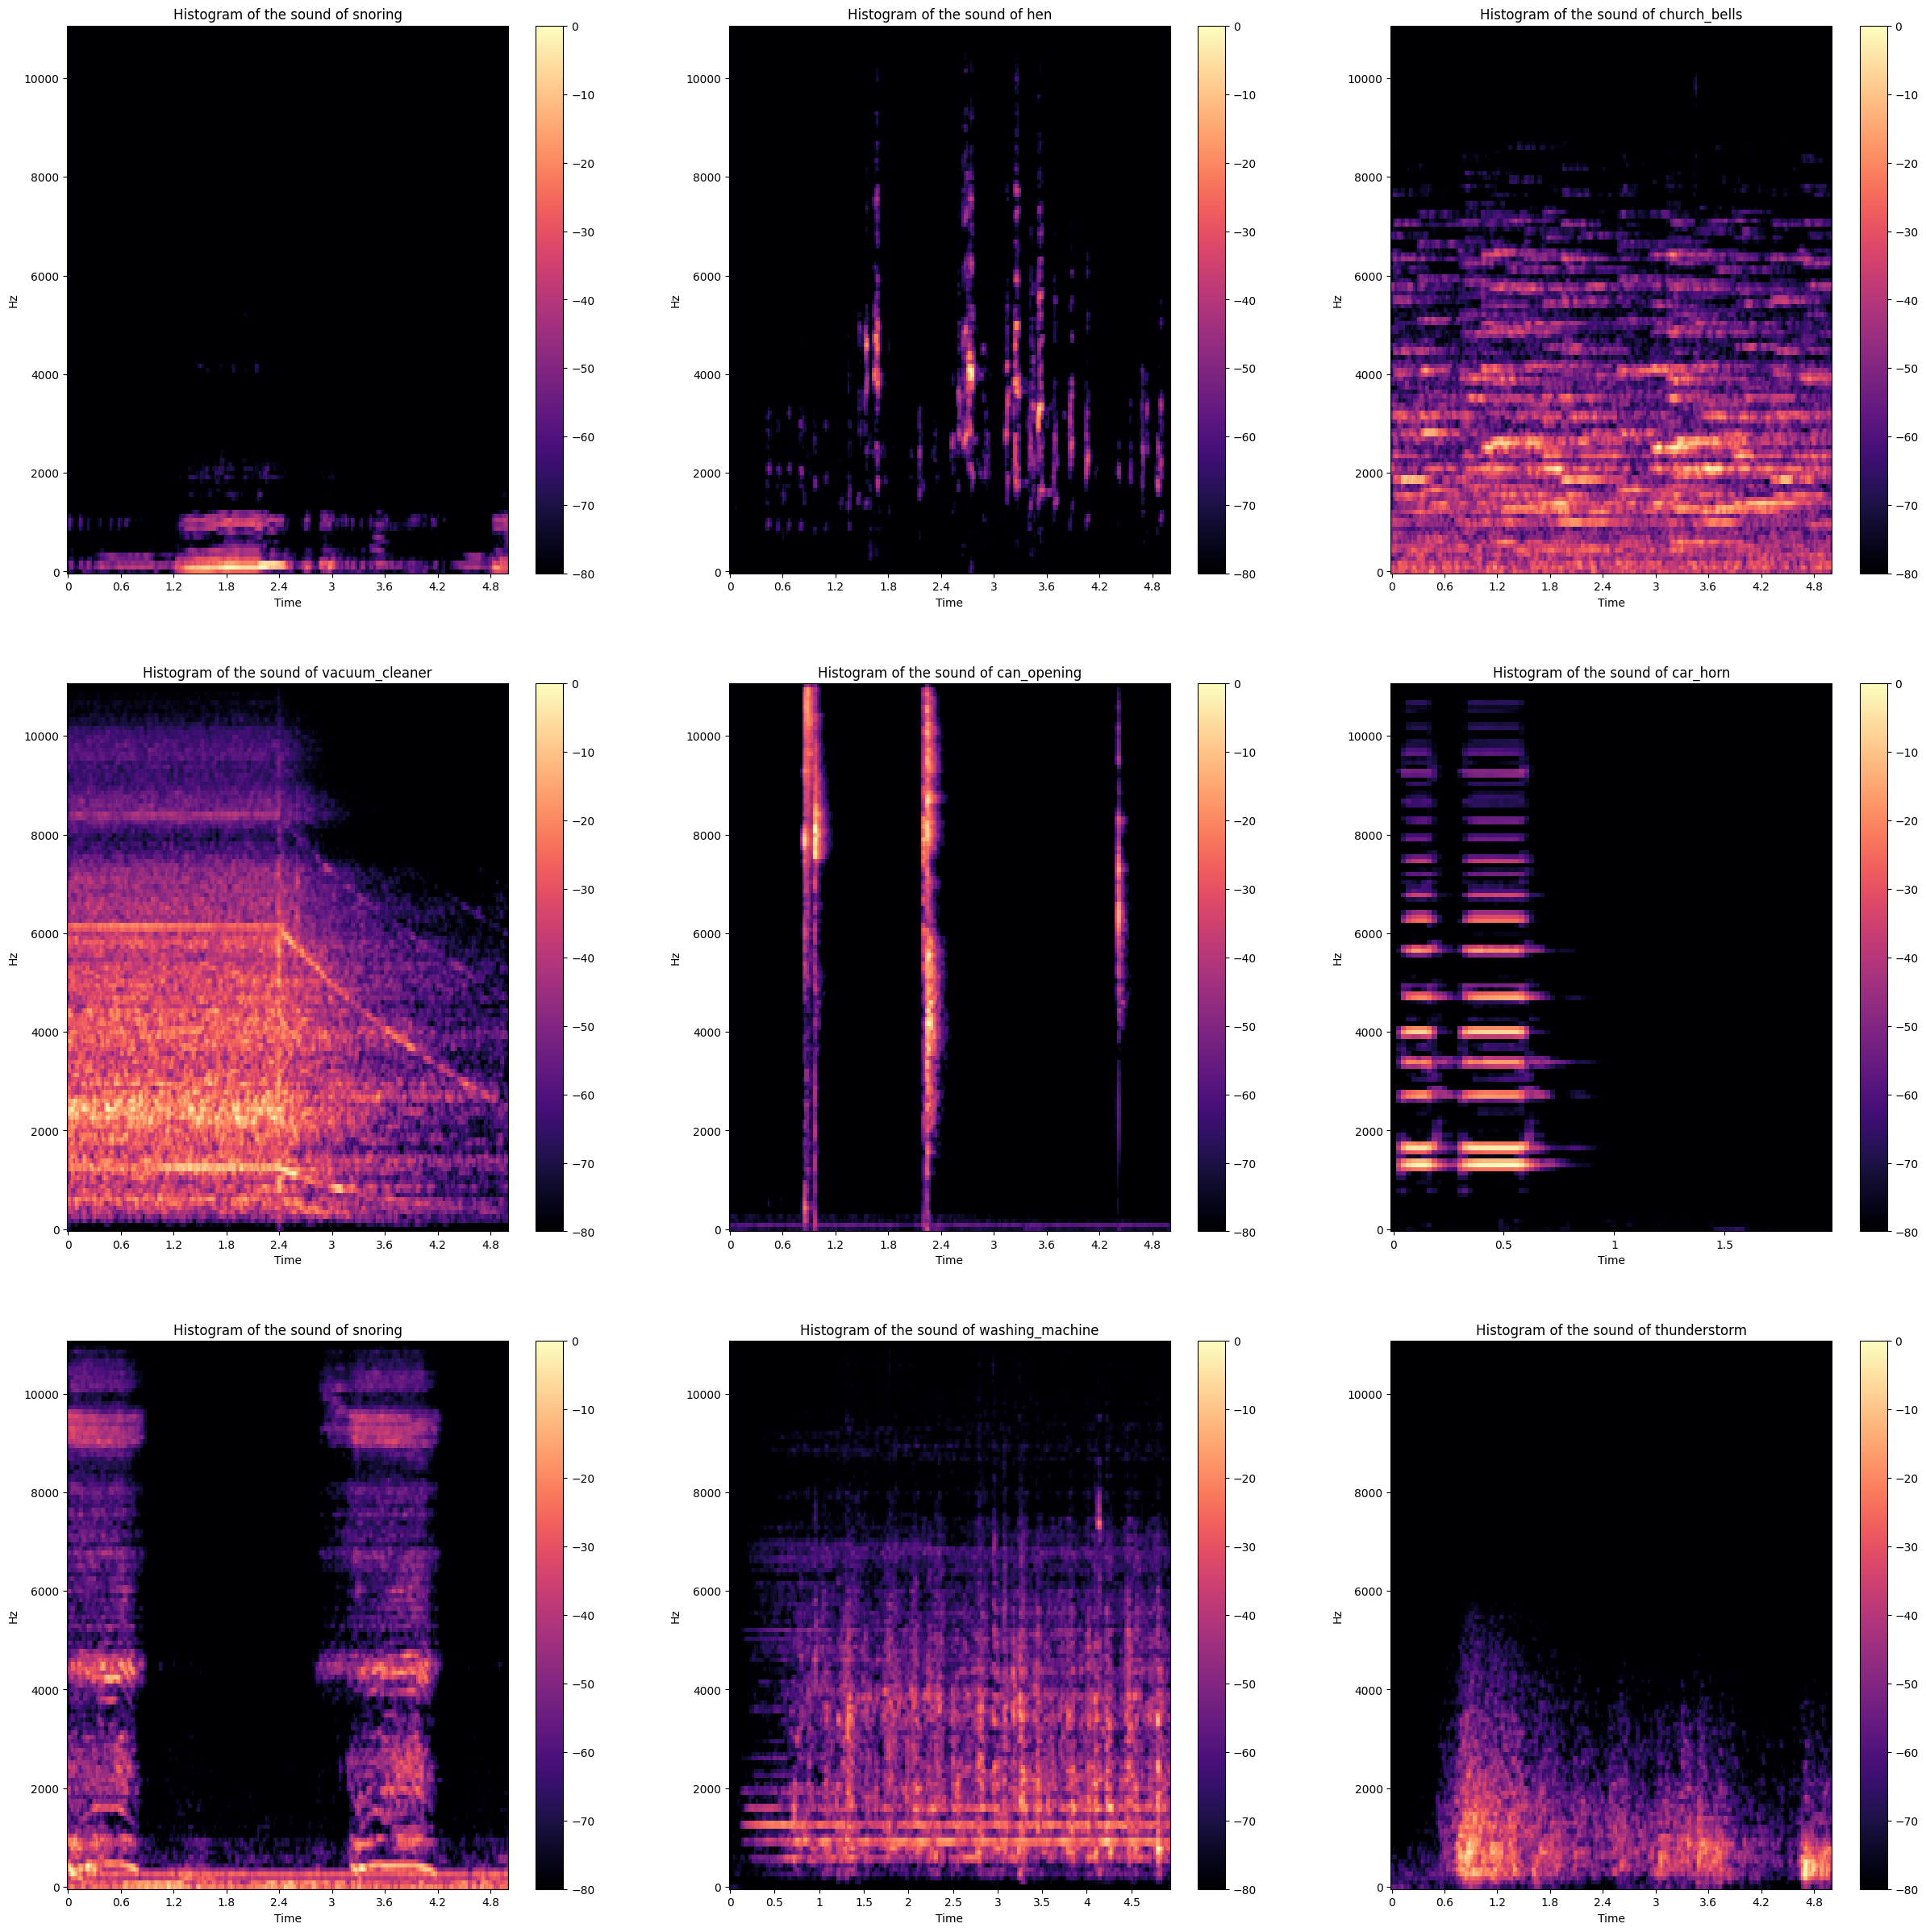

In [17]:
plt.figure(figsize=(30,30))
for i in range(1,10):
    plt.subplot(3,3,i)
    X, _ = librosa.effects.trim(plot_audios[i][0])
    XS = librosa.feature.melspectrogram(y=X, sr=sr)
    Xdb = librosa.amplitude_to_db(XS, ref=np.max)
    librosa.display.specshow(Xdb, sr=plot_audios[i][1], x_axis='time', y_axis='hz')
    plt.colorbar()
    try:
        plt.title("Histogram of the sound of " + decoder[int(plot_files[i][-6:-4])] )
    except:
        plt.title("Histogram of the sound of " + decoder[int(plot_files[i][-5:-4])] )